# Ridership Analysis

In [3]:
pip install pandas fuzzywuzzy rapidfuzz dask pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00:00:01
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840629 sha256=1467d224aa2a6eb547b40bb41f3ddf7d6e407650c386c6d19c14042af6729204
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


# Importing and Preprocesing Datasets

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mta-combined/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv
/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv
/kaggle/input/mta-combined/MTA_Subway_Turnstile_Usage_Data__2022.csv
/kaggle/input/mta-combined/MTA_Subway_Major_Incidents__Beginning_2020.csv
/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv
/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv
/kaggle/input/mta-combined/MTA_Key_Performance_Indicators__2008-2021.csv
/kaggle/input/mta-combined/MTA_Daily_Ridership_Data__Beginning_2020.csv
/kaggle/input/mta-combined/MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv
/kaggle/input/mta-combined/MTA_Subway_Stations.csv
/kaggle/input/mta-combined/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv
/kaggle/input/mta-combined/MTA_Subway_and_Bus_Lost_Time_Accidents__Beginning_2021.csv
/kaggle/input/mta-combined/MTA_Customer_Feedback_Data__2014-2019.csv
/kaggle/input/ridership-d

In [5]:
import pandas as pd
import random

# Input and output file paths
input_file = "/kaggle/input/mta-combined/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"  # Replace with your file path
output_file = "MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"

# Parameters
sample_fraction = 0.05  # 5%
chunksize = 1000000  # Number of rows to process at a time
random_seed = 42  # Fixed random seed for reproducibility

# Open the output file in write mode to save the sampled data
try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  # Set low_memory to False
            # Randomly sample rows based on the fraction
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            # Append sampled rows to the output file
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  # Add header only once
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv


In [6]:
import pandas as pd
import random

# Input and output file paths
input_file = "/kaggle/input/mta-combined/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"  # Replace with your file path
output_file = "MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"

# Parameters
sample_fraction = 0.05  # 5%
chunksize = 1000000  # Number of rows to process at a time
random_seed = 42  # Fixed random seed for reproducibility

# Open the output file in write mode to save the sampled data
try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  # Set low_memory to False
            # Randomly sample rows based on the fraction
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            # Append sampled rows to the output file
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  # Add header only once
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv


In [7]:
import pandas as pd
import os

def load_csvs_and_sample(csv_list, size_limit_gb=1.5, sample_fraction=0.05):
    """
    Load CSV files into dataframes and sample large files to bring their size below the specified limit.

    Args:
    - csv_list (list): List of CSV file paths to load.
    - size_limit_gb (float): Size limit in GB for each CSV file.
    - sample_fraction (float): Fraction to sample for files exceeding the size limit.

    Returns:
    - dict: Dictionary containing dataframe names (keys) and dataframes (values).
    """
    size_limit_bytes = size_limit_gb * (1024 ** 3)  # Convert GB to bytes
    dataframes = {}  # To store the resulting dataframes

    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"File {csv_path} does not exist.")
            continue

        # Get file size in bytes
        file_size_bytes = os.path.getsize(csv_path)

        print(f"Processing {os.path.basename(csv_path)}: Size = {file_size_bytes / (1024 ** 3):.2f} GB")

        # Load the CSV, sampling if necessary
        if file_size_bytes > size_limit_bytes:
            print(f"{os.path.basename(csv_path)} exceeds size limit. Loading and sampling...")
            df = pd.read_csv(csv_path).sample(frac=sample_fraction, random_state=42)
        else:
            print(f"{os.path.basename(csv_path)} is within size limit. Loading...")
            df = pd.read_csv(csv_path)

        # Add the dataframe to the dictionary with the name of the CSV (without extension)
        dataframes[os.path.splitext(os.path.basename(csv_path))[0]] = df

    return dataframes

# List of CSV files with corrected paths
csv_files = [
    "/kaggle/input/mta-combined/MTA_Customer_Feedback_Data__2014-2019.csv",
    "/kaggle/input/mta-combined/MTA_Daily_Ridership_Data__Beginning_2020.csv",
    "/kaggle/input/mta-combined/MTA_Key_Performance_Indicators__2008-2021.csv",
    "/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv",
    "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv",
    "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Major_Incidents__Beginning_2020.csv",
    "/kaggle/working/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Turnstile_Usage_Data__2022.csv",
    "/kaggle/input/mta-combined/MTA_Subway_and_Bus_Lost_Time_Accidents__Beginning_2021.csv"
]

# Load the dataframes
dataframes = load_csvs_and_sample(csv_files)

# Access dataframes by their names
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")


Processing MTA_Customer_Feedback_Data__2014-2019.csv: Size = 0.05 GB
MTA_Customer_Feedback_Data__2014-2019.csv is within size limit. Loading...
Processing MTA_Daily_Ridership_Data__Beginning_2020.csv: Size = 0.00 GB
MTA_Daily_Ridership_Data__Beginning_2020.csv is within size limit. Loading...
Processing MTA_Key_Performance_Indicators__2008-2021.csv: Size = 0.00 GB
MTA_Key_Performance_Indicators__2008-2021.csv is within size limit. Loading...
Processing MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv: Size = 0.00 GB
MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv is within size limit. Loading...
Processing MTA_Service_Alerts__Beginning_April_2020.csv: Size = 0.09 GB
MTA_Service_Alerts__Beginning_April_2020.csv is within size limit. Loading...


/tmp/ipykernel_24/4285685069.py:35: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Processing MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv: Size = 0.00 GB
MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv is within size limit. Loading...
Processing MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv: Size = 0.72 GB
MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv is within size limit. Loading...
Processing MTA_Subway_Major_Incidents__Beginning_2020.csv: Size = 0.00 GB
MTA_Subway_Major_Incidents__Beginning_2020.csv is within size limit. Loading...
Processing MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv: Size = 0.70 GB
MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv is within size limit. Loading...
Processing MTA_Subway_Stations.csv: Size = 0.00 GB
MTA_Subway_Stations.csv is within size limit. Loading...
Processing MTA_Subway_Stations_and_Complexes.csv: Size = 0.00 GB
MTA_Subway_Stations_and_Complexes.csv is within size limit. Loading...
Processing MTA_Subway_Turnstile_Usage_Data__2022.csv: Size = 0.71 GB
MTA_Subway_

# Exploratory Data Analysis

In [8]:
# Example: Check summary statistics for each DataFrame
for name, df in dataframes.items():
    print(f"Summary statistics for {name}:\n")
    print(df.describe(include='all'), "\n")

Summary statistics for MTA_Customer_Feedback_Data__2014-2019:

           Agency Commendation or Complaint Subject Matter  \
count      623755                    623755         623753   
unique          8                         2             26   
top     NYC Buses                 Complaint      Employees   
freq       300660                    598499         223233   
mean          NaN                       NaN            NaN   
std           NaN                       NaN            NaN   
min           NaN                       NaN            NaN   
25%           NaN                       NaN            NaN   
50%           NaN                       NaN            NaN   
75%           NaN                       NaN            NaN   
max           NaN                       NaN            NaN   

               Subject Detail  Issue Detail           Year        Quarter  \
count                  621575        568366  623755.000000  623755.000000   
unique                    189         

In [9]:
dataframes["MTA_Subway_Hourly_Ridership__Beginning_July_2020"].head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,04/02/2024 09:00:00 AM,subway,429,"Freeman St (2,5)",Bronx,metrocard,Metrocard - Unlimited 7-Day,13,0,40.829994,-73.891870,POINT (-73.89187 40.829994)
1,03/27/2024 11:00:00 PM,subway,271,"Steinway St (M,R)",Queens,metrocard,Metrocard - Unlimited 7-Day,12,0,40.756878,-73.920740,POINT (-73.92074 40.756878)
2,03/07/2024 04:00:00 PM,subway,268,"65 St (M,R)",Queens,metrocard,Metrocard - Seniors & Disability,2,0,40.749670,-73.898450,POINT (-73.89845 40.74967)
3,03/20/2024 05:00:00 AM,subway,118,3 Av (L),Manhattan,omny,OMNY - Full Fare,4,1,40.732850,-73.986120,POINT (-73.98612 40.73285)
4,03/27/2024 07:00:00 PM,subway,306,125 St (1),Manhattan,metrocard,Metrocard - Unlimited 7-Day,14,0,40.815582,-73.958374,POINT (-73.958374 40.815582)


In [10]:
# Schema mapping for all dataframes
schema_mapping = {}

for name, df in dataframes.items():
    schema_mapping[name] = {
        "columns": list(df.columns),
        "dtypes": df.dtypes.to_dict()
    }

# Display schema mapping
for name, schema in schema_mapping.items():
    print(f"Dataset: {name}")
    print("Columns:", schema["columns"])
    print("Data Types:", schema["dtypes"])
    print("-" * 50)


Dataset: MTA_Customer_Feedback_Data__2014-2019
Columns: ['Agency', 'Commendation or Complaint', 'Subject Matter', 'Subject Detail', 'Issue Detail', 'Year', 'Quarter', 'Branch/Line/Route']
Data Types: {'Agency': dtype('O'), 'Commendation or Complaint': dtype('O'), 'Subject Matter': dtype('O'), 'Subject Detail': dtype('O'), 'Issue Detail': dtype('O'), 'Year': dtype('int64'), 'Quarter': dtype('int64'), 'Branch/Line/Route': dtype('O')}
--------------------------------------------------
Dataset: MTA_Daily_Ridership_Data__Beginning_2020
Columns: ['Date', 'Subways: Total Estimated Ridership', 'Subways: % of Comparable Pre-Pandemic Day', 'Buses: Total Estimated Ridership', 'Buses: % of Comparable Pre-Pandemic Day', 'LIRR: Total Estimated Ridership', 'LIRR: % of Comparable Pre-Pandemic Day', 'Metro-North: Total Estimated Ridership', 'Metro-North: % of Comparable Pre-Pandemic Day', 'Access-A-Ride: Total Scheduled Trips', 'Access-A-Ride: % of Comparable Pre-Pandemic Day', 'Bridges and Tunnels: To

In [11]:
# Ensure hourly ridership data is loaded
if 'MTA_Subway_Hourly_Ridership__Beginning_July_2020' in dataframes:
    hourly_ridership = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

    # Convert 'transit_timestamp' to datetime if not already done
    hourly_ridership['transit_timestamp'] = pd.to_datetime(hourly_ridership['transit_timestamp'])

    # Extract date from timestamp
    hourly_ridership['Date'] = hourly_ridership['transit_timestamp'].dt.date

    # Aggregate hourly ridership into daily totals
    daily_from_hourly = hourly_ridership.groupby('Date', as_index=False).agg({'ridership': 'sum'})

    # Rename columns for clarity
    daily_from_hourly.rename(columns={'ridership': 'Hourly Aggregated Ridership'}, inplace=True)

    print("Hourly data successfully aggregated into daily data.")
else:
    print("Hourly ridership data is not loaded.")


Hourly data successfully aggregated into daily data.


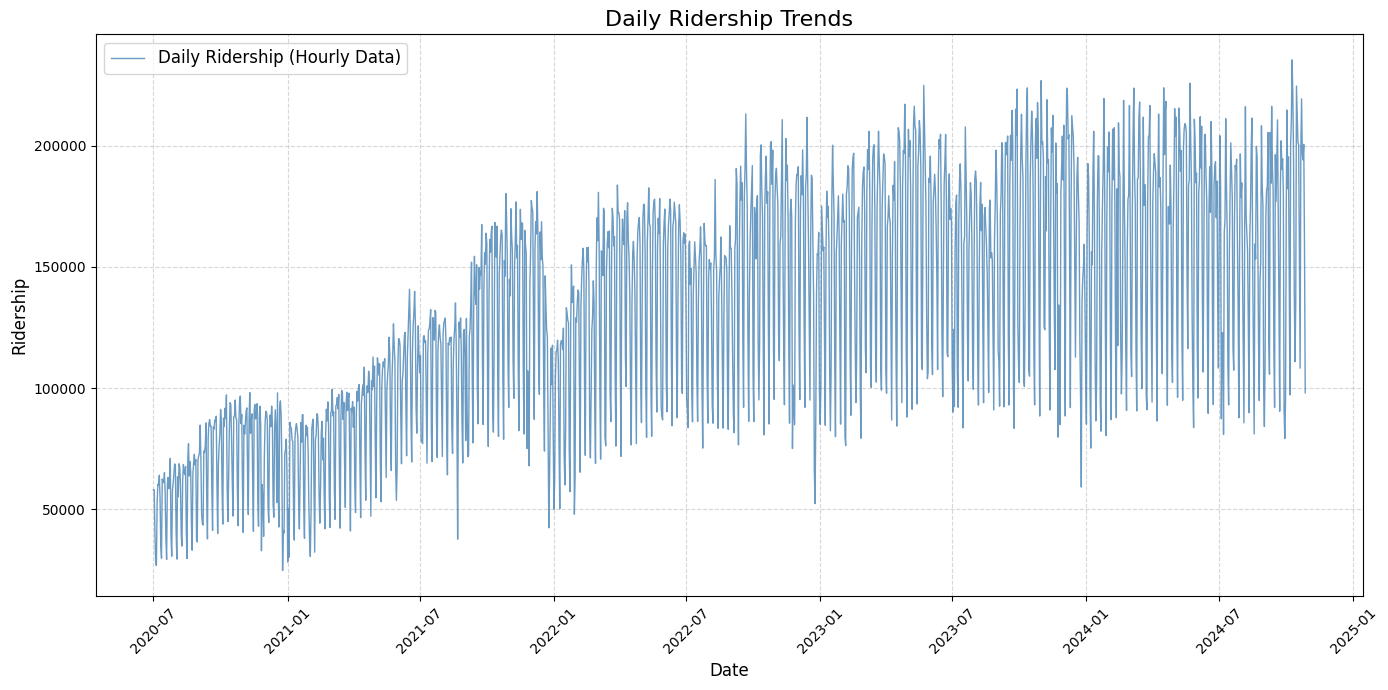

In [12]:
import matplotlib.pyplot as plt

# Plot daily ridership trends (Hourly Aggregated Data)
plt.figure(figsize=(14, 7))
plt.plot(daily_from_hourly['Date'], daily_from_hourly['Hourly Aggregated Ridership'], 
         label="Daily Ridership (Hourly Data)", color='steelblue', alpha=0.8, linewidth=1)

# Add titles and labels
plt.title("Daily Ridership Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Ridership", fontsize=12)

# Customize x-axis for better readability
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()




In [18]:
# Ensure the datasets are loaded
if 'MTA_Daily_Ridership_Data__Beginning_2020' in dataframes and 'MTA_Subway_Hourly_Ridership__Beginning_July_2020' in dataframes:
    # Load the datasets
    daily_ridership = dataframes['MTA_Daily_Ridership_Data__Beginning_2020']
    daily_from_hourly = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

    # Ensure 'Date' column in daily_ridership is in datetime format
    daily_ridership['Date'] = pd.to_datetime(daily_ridership['Date'])

    # Ensure 'transit_timestamp' in daily_from_hourly is in datetime format
    daily_from_hourly['transit_timestamp'] = pd.to_datetime(daily_from_hourly['transit_timestamp'])
    # Extract only the date part
    daily_from_hourly['Date'] = daily_from_hourly['transit_timestamp'].dt.date
    # Convert the extracted date back to datetime for consistency
    daily_from_hourly['Date'] = pd.to_datetime(daily_from_hourly['Date'])

    # Summarize hourly data to daily data
    daily_from_hourly = daily_from_hourly.groupby('Date', as_index=False)['ridership'].sum()
    daily_from_hourly.rename(columns={'ridership': 'Hourly Aggregated Ridership'}, inplace=True)

    # Now perform the merge
    daily_combined = pd.merge(daily_ridership, daily_from_hourly, on='Date', how='outer')
    print("Datasets successfully combined!")
else:
    print("Required datasets are not loaded.")


Datasets successfully combined!


In [19]:
# Ensure 'Date' column in both datasets is in datetime format
daily_ridership['Date'] = pd.to_datetime(daily_ridership['Date'])
daily_from_hourly['Date'] = pd.to_datetime(daily_from_hourly['Date'])

# Now perform the merge
daily_combined = pd.merge(daily_ridership, daily_from_hourly, on='Date', how='outer')
print("Datasets successfully combined!")



Datasets successfully combined!


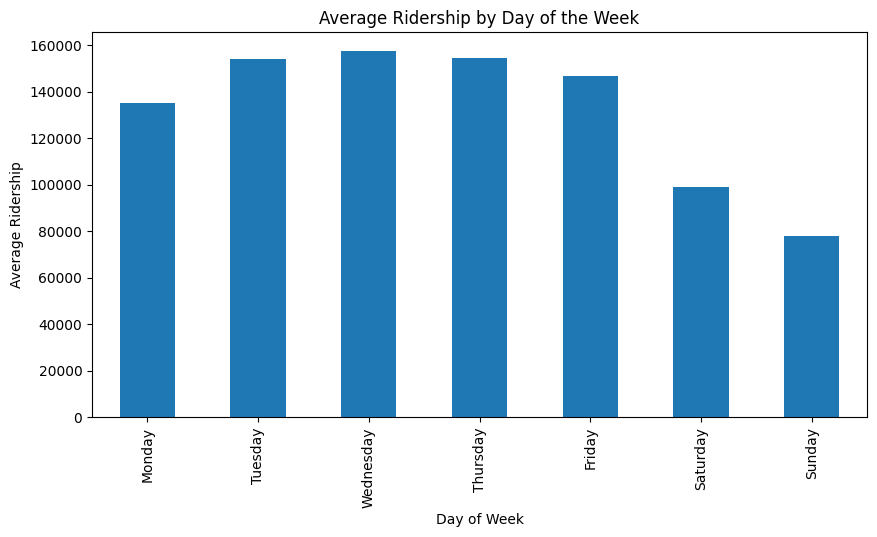

In [20]:
# Add 'DayOfWeek' column to classify days
daily_combined['DayOfWeek'] = daily_combined['Date'].dt.day_name()

# Group by DayOfWeek and calculate average ridership
weekday_trends = daily_combined.groupby('DayOfWeek')['Hourly Aggregated Ridership'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot weekday vs. weekend trends
plt.figure(figsize=(10, 5))
weekday_trends.plot(kind='bar')
plt.title('Average Ridership by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Ridership')
plt.show()


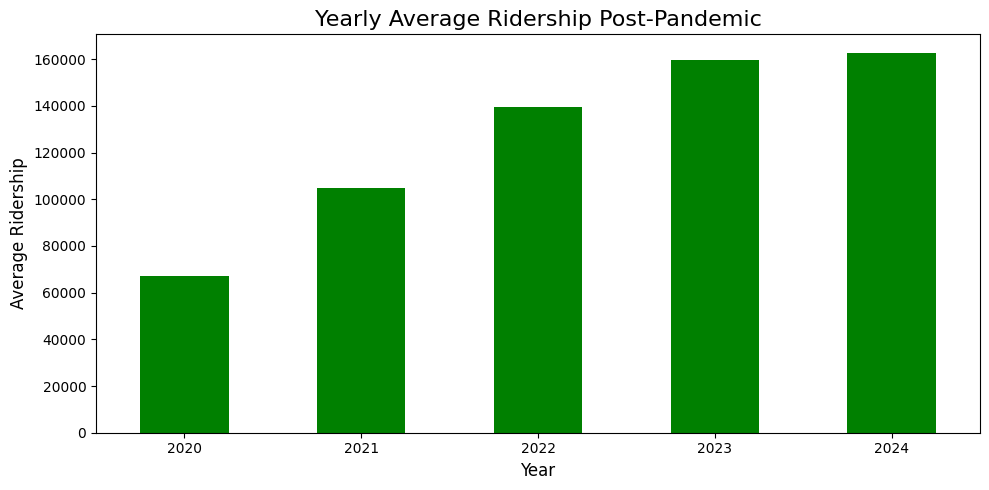

Year
2020     67258.331522
2021    104827.200000
2022    139717.019178
2023    159612.147945
2024    162536.252492
Name: Hourly Aggregated Ridership, dtype: float64


In [21]:
# Extract the year from the 'Date' column
daily_combined['Year'] = daily_combined['Date'].dt.year

# Group post-pandemic data by year
post_pandemic_yearly = daily_combined[daily_combined['Year'] >= 2020].groupby('Year')['Hourly Aggregated Ridership'].mean()

# Plot yearly recovery trends
plt.figure(figsize=(10, 5))
post_pandemic_yearly.plot(kind='bar', color='green')
plt.title('Yearly Average Ridership Post-Pandemic', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Ridership', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print yearly ridership for interpretation
print(post_pandemic_yearly)


In [22]:
# Ensure the dataset path is correct
service_alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020']

# Convert 'Date' column to datetime
service_alerts['Date'] = pd.to_datetime(service_alerts['Date'])

# Check if the dataset loaded correctly
print(service_alerts.head())


   Alert ID  Event ID  Update Number                Date       Agency  \
0    345264    167130              0 2024-08-26 11:33:00  NYCT Subway   
1    345139    167055              0 2024-08-25 22:47:00  NYCT Subway   
2    344558    166767              0 2024-08-23 14:44:00           BT   
3    342848    165879              0 2024-08-18 11:12:00           BT   
4    342668    165788              0 2024-08-17 12:11:00  NYCT Subway   

   Status Label               Affected  \
0        delays                      6   
1        delays                      A   
2  planned-work     Throgs Neck Bridge   
3        delays  Marine Parkway Bridge   
4        delays                      N   

                                              Header Description  
0  Northbound 6 trains are delayed while we addre...         NaN  
1  Southbound A trains are delayed while FDNY res...         NaN  
2  Throgs Neck Bridge: Planned work; Bronx bound ...         NaN  
3  MPB: Vehicle collision; Brooklyn boun

In [23]:
# Group service_alerts by Date to create service_alerts_per_day
service_alerts_per_day = service_alerts.groupby('Date').size().reset_index(name='Alert Count')


In [24]:
# Check the first few rows
print(service_alerts.head())

# Check column names
print(service_alerts.columns)

# Check unique values in key columns
print(service_alerts['Status Label'].unique())  # Example: Types of status labels
print(service_alerts['Agency'].unique())        # Example: Agencies reporting alerts


   Alert ID  Event ID  Update Number                Date       Agency  \
0    345264    167130              0 2024-08-26 11:33:00  NYCT Subway   
1    345139    167055              0 2024-08-25 22:47:00  NYCT Subway   
2    344558    166767              0 2024-08-23 14:44:00           BT   
3    342848    165879              0 2024-08-18 11:12:00           BT   
4    342668    165788              0 2024-08-17 12:11:00  NYCT Subway   

   Status Label               Affected  \
0        delays                      6   
1        delays                      A   
2  planned-work     Throgs Neck Bridge   
3        delays  Marine Parkway Bridge   
4        delays                      N   

                                              Header Description  
0  Northbound 6 trains are delayed while we addre...         NaN  
1  Southbound A trains are delayed while FDNY res...         NaN  
2  Throgs Neck Bridge: Planned work; Bronx bound ...         NaN  
3  MPB: Vehicle collision; Brooklyn boun

In [25]:
# Ensure the dataset is loaded
if 'MTA_Service_Alerts__Beginning_April_2020' in dataframes:
    service_alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020']

    # Count alerts by status label
    alert_counts_by_status = service_alerts['Status Label'].value_counts()

    # Create DataFrame from the status label counts
    status_counts = pd.Series(alert_counts_by_status)
    top_5_alerts = status_counts.nlargest(5)

    # Create a DataFrame with the top 5 alerts
    df = pd.DataFrame({
        'Status Label': top_5_alerts.index,
        'Count': top_5_alerts.values
    })

    # Display the table with formatting
    print(df.to_markdown(index=False))
else:
    print("The 'MTA_Service_Alerts__Beginning_April_2020' dataset is not loaded.")


| Status Label      |   Count |
|:------------------|--------:|
| delays            |  173711 |
| some-delays       |   48120 |
| buses-detoured    |   16901 |
| weekday-service   |   16850 |
| essential-service |    8219 |


Average Ridership with Alerts: 147501.73469387754
Average Ridership without Alerts: 129346.88689138577


/tmp/ipykernel_24/1750577182.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_with_alerts['Alert Count'].fillna(0, inplace=True)


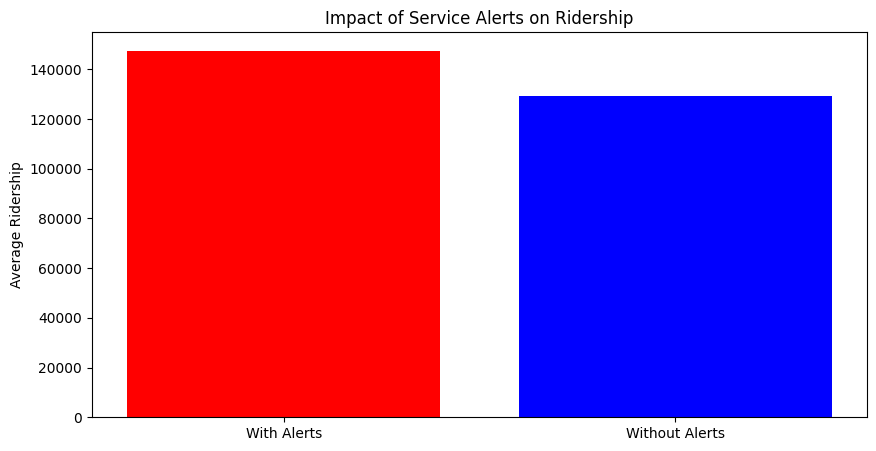

In [26]:
# Merge with daily_combined
daily_with_alerts = daily_combined.merge(service_alerts_per_day, on='Date', how='left')

# Fill missing values for 'Alert Count' with 0
daily_with_alerts['Alert Count'].fillna(0, inplace=True)

# Compare ridership on days with alerts vs. without alerts
avg_ridership_with_alerts = daily_with_alerts[daily_with_alerts['Alert Count'] > 0]['Hourly Aggregated Ridership'].mean()
avg_ridership_without_alerts = daily_with_alerts[daily_with_alerts['Alert Count'] == 0]['Hourly Aggregated Ridership'].mean()

# Print results
print(f"Average Ridership with Alerts: {avg_ridership_with_alerts}")
print(f"Average Ridership without Alerts: {avg_ridership_without_alerts}")

# Plot comparison
plt.figure(figsize=(10, 5))
plt.bar(['With Alerts', 'Without Alerts'], [avg_ridership_with_alerts, avg_ridership_without_alerts], color=['red', 'blue'])
plt.title('Impact of Service Alerts on Ridership')
plt.ylabel('Average Ridership')
plt.show()


In [27]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, dayofweek, avg, to_date

# Initialize Spark session
spark = SparkSession.builder \
    .appName("MTA Analysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()


# Paths to datasets
hourly_ridership_path = "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"
daily_ridership_path = "/kaggle/input/mta-combined/MTA_Daily_Ridership_Data__Beginning_2020.csv"
service_alerts_path = "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv"

# Load datasets
hourly_ridership = spark.read.csv(hourly_ridership_path, header=True, inferSchema=True)
daily_ridership = spark.read.csv(daily_ridership_path, header=True, inferSchema=True)
service_alerts = spark.read.csv(service_alerts_path, header=True, inferSchema=True)

# Show schema and preview datasets
print("Hourly Ridership Schema:")
hourly_ridership.printSchema()
hourly_ridership.show(5)

print("Daily Ridership Schema:")
daily_ridership.printSchema()
daily_ridership.show(5)

print("Service Alerts Schema:")
service_alerts.printSchema()
service_alerts.show(5)

# --------------------------------------------------
# 1. Weekday vs. Weekend Trends (Hourly Ridership)
# --------------------------------------------------
# Add a 'DayOfWeek' column to classify days (1=Sunday, 7=Saturday)
hourly_ridership = hourly_ridership.withColumn("DayOfWeek", dayofweek(to_date(col("transit_timestamp"), "MM/dd/yyyy")))

# Calculate average ridership by day of the week
weekday_trends = (
    hourly_ridership.groupBy("DayOfWeek")
    .agg(avg("ridership").alias("AvgRidership"))
    .orderBy("DayOfWeek")
)

print("Weekday Trends:")
weekday_trends.show()

# --------------------------------------------------
# 2. Aggregate Daily Ridership (From Hourly Data)
# --------------------------------------------------
# Convert timestamp to date and aggregate ridership
daily_from_hourly = (
    hourly_ridership.withColumn("Date", to_date(col("transit_timestamp"), "MM/dd/yyyy"))
    .groupBy("Date")
    .agg({"ridership": "sum"})
    .withColumnRenamed("sum(ridership)", "TotalRidership")
)

print("Aggregated Daily Ridership (from Hourly Data):")
daily_from_hourly.show()

# --------------------------------------------------
# 3. Merge with Daily Ridership Data
# --------------------------------------------------
# Convert dates to the same format and merge
daily_ridership = daily_ridership.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy"))
daily_combined = daily_from_hourly.join(daily_ridership, on="Date", how="outer")

print("Merged Daily Ridership Data:")
daily_combined.show()

# --------------------------------------------------
# 4. Impact of Service Alerts on Ridership
# --------------------------------------------------
# Aggregate service alerts by date
service_alerts = service_alerts.withColumn("AlertDate", to_date(col("Date"), "MM/dd/yyyy"))
alerts_per_day = service_alerts.groupBy("AlertDate").count().withColumnRenamed("count", "AlertCount")

# Merge alerts with daily combined data
daily_with_alerts = daily_combined.join(alerts_per_day, daily_combined.Date == alerts_per_day.AlertDate, how="left").drop("AlertDate")
daily_with_alerts = daily_with_alerts.fillna({"AlertCount": 0})

# Calculate average ridership on days with and without alerts
avg_ridership_with_alerts = daily_with_alerts.filter(col("AlertCount") > 0).select(avg("TotalRidership")).collect()[0][0]
avg_ridership_without_alerts = daily_with_alerts.filter(col("AlertCount") == 0).select(avg("TotalRidership")).collect()[0][0]

print(f"Average Ridership with Alerts: {avg_ridership_with_alerts}")
print(f"Average Ridership without Alerts: {avg_ridership_without_alerts}")


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/09 23:48:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Hourly Ridership Schema:
root
 |-- transit_timestamp: string (nullable = true)
 |-- transit_mode: string (nullable = true)
 |-- station_complex_id: string (nullable = true)
 |-- station_complex: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- fare_class_category: string (nullable = true)
 |-- ridership: integer (nullable = true)
 |-- transfers: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Georeference: string (nullable = true)

+--------------------+------------+------------------+-----------------+---------+--------------+--------------------+---------+---------+---------+----------+--------------------+
|   transit_timestamp|transit_mode|station_complex_id|  station_complex|  borough|payment_method| fare_class_category|ridership|transfers| latitude| longitude|        Georeference|
+--------------------+------------+------------------+-----------------+

+---------+------------------+
|DayOfWeek|      AvgRidership|
+---------+------------------+
|        1|26.377112939416605|
|        2| 39.43679238180294|
|        3| 44.35648706118971|
|        4|45.175146225506595|
|        5| 44.46523980548581|
|        6|42.096588398982384|
|        7|32.391163739994376|
+---------+------------------+

Aggregated Daily Ridership (from Hourly Data):


+----------+--------------+
|      Date|TotalRidership|
+----------+--------------+
|2024-09-18|        193493|
|2024-02-05|        177598|
|2024-06-04|        185694|
|2024-05-30|        184733|
|2024-06-12|        204746|
|2024-08-27|        151984|
|2022-01-31|        129024|
|2024-05-25|        128395|
|2024-01-07|         75258|
|2024-08-30|        176048|
|2024-04-20|        134096|
|2024-01-11|        205991|
|2024-07-08|        164417|
|2024-09-10|        184552|
|2024-08-05|        165278|
|2024-02-04|         86957|
|2024-05-19|        116313|
|2024-08-12|        162304|
|2022-02-16|        152118|
|2024-08-14|        200215|
+----------+--------------+
only showing top 20 rows

Merged Daily Ridership Data:


+----------+--------------+----------------------------------+-----------------------------------------+--------------------------------+---------------------------------------+-------------------------------+--------------------------------------+--------------------------------------+---------------------------------------------+------------------------------------+-----------------------------------------------+----------------------------------+-----------------------------------------------------+------------------------------------------------+-------------------------------------------------------+
|      Date|TotalRidership|Subways: Total Estimated Ridership|Subways: % of Comparable Pre-Pandemic Day|Buses: Total Estimated Ridership|Buses: % of Comparable Pre-Pandemic Day|LIRR: Total Estimated Ridership|LIRR: % of Comparable Pre-Pandemic Day|Metro-North: Total Estimated Ridership|Metro-North: % of Comparable Pre-Pandemic Day|Access-A-Ride: Total Scheduled Trips|Access-A-Ride: % 

Average Ridership with Alerts: 131339.32945736434
Average Ridership without Alerts: 171960.53125


In [33]:
# Ensure the dataset is loaded
if 'MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008' in dataframes:
    ridership_data = dataframes['MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008']

    # Confirm the columns in the dataset
    print("Ridership Data Columns:", ridership_data.columns)

    # Ensure 'stations' dataframe is loaded
    if 'MTA_Subway_Stations' in dataframes:
        stations = dataframes['MTA_Subway_Stations']

        # Confirm the columns in the stations dataset
        print("Stations Data Columns:", stations.columns)

        # Add average ridership by borough as a placeholder
        if 'Ridership' in ridership_data.columns:
            stations['Average Ridership'] = ridership_data['Ridership'].mean()

            # Check the result
            print(stations[['Stop Name', 'Average Ridership']].head())
        else:
            print("The column 'Ridership' is missing in the dataset.")
    else:
        print("Stations data is not loaded.")
else:
    print("Ridership data is not loaded.")




Ridership Data Columns: Index(['Month', 'Agency', 'Ridership'], dtype='object')
Stations Data Columns: Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference'],
      dtype='object')
              Stop Name  Average Ridership
0           Bleecker St       2.086436e+07
1             Bay 50 St       2.086436e+07
2        Castle Hill Av       2.086436e+07
3           Franklin Av       2.086436e+07
4  Delancey St-Essex St       2.086436e+07


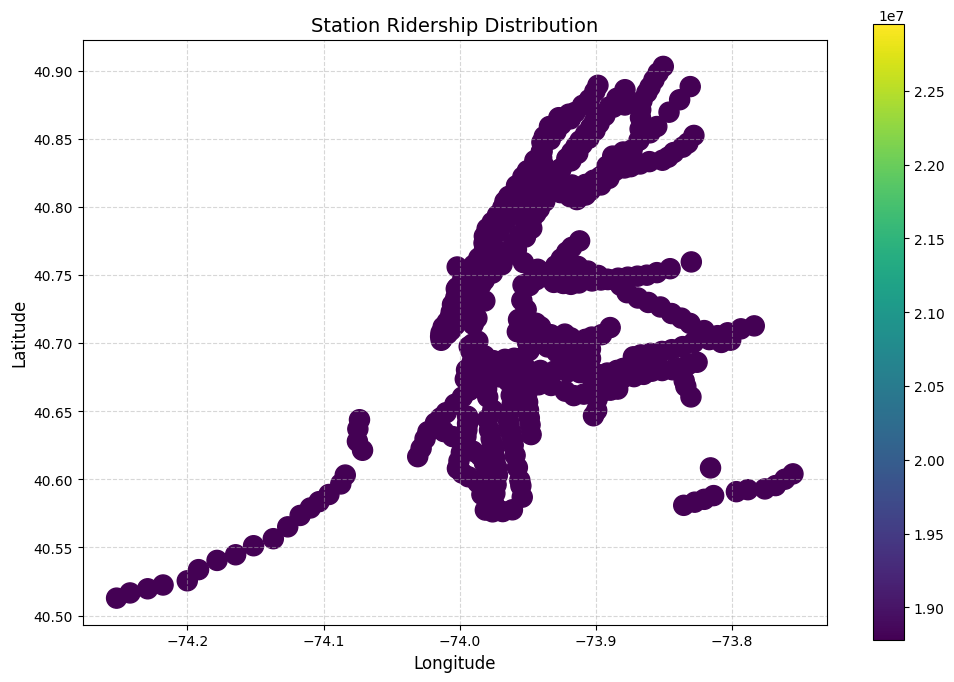

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure 'stations' dataset is loaded
if 'MTA_Subway_Stations' in dataframes:
    stations = dataframes['MTA_Subway_Stations']
    
    # Verify necessary columns exist
    if 'GTFS Longitude' in stations.columns and 'GTFS Latitude' in stations.columns:
        # Create a GeoDataFrame for stations
        stations_gdf = gpd.GeoDataFrame(
            stations, 
            geometry=gpd.points_from_xy(stations['GTFS Longitude'], stations['GTFS Latitude'])
        )
        
        # Add a placeholder 'Average Ridership' column if not present
        if 'Average Ridership' not in stations_gdf.columns:
            stations_gdf['Average Ridership'] = stations_gdf.index  # Placeholder for demonstration
            
        # Plot ridership on a map with enhanced visualization
        stations_gdf.plot(
            column='Average Ridership',
            cmap='viridis',  # More contrasting colormap
            legend=True,
            figsize=(12, 8),
            markersize=stations_gdf['Average Ridership'] / 1e5  # Adjust point size dynamically
        )
        plt.title('Station Ridership Distribution', fontsize=14)
        plt.xlabel('Longitude', fontsize=12)
        plt.ylabel('Latitude', fontsize=12)
        plt.grid(visible=True, linestyle='--', alpha=0.5)
        plt.show()
    else:
        print("The required longitude and latitude columns are missing.")
else:
    print("Stations data is not loaded.")


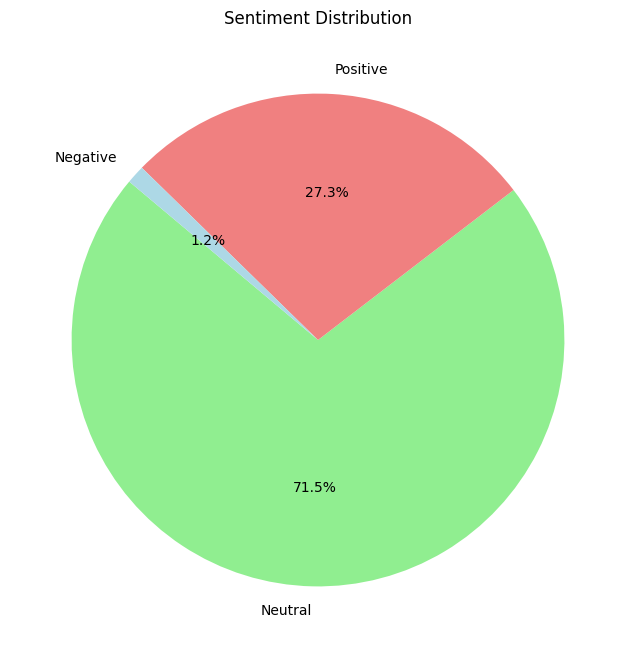

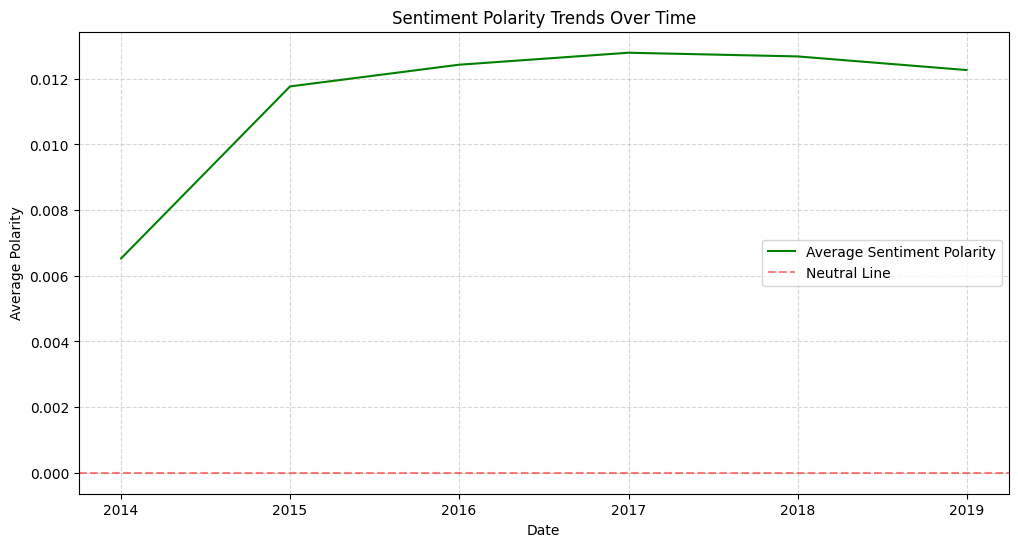

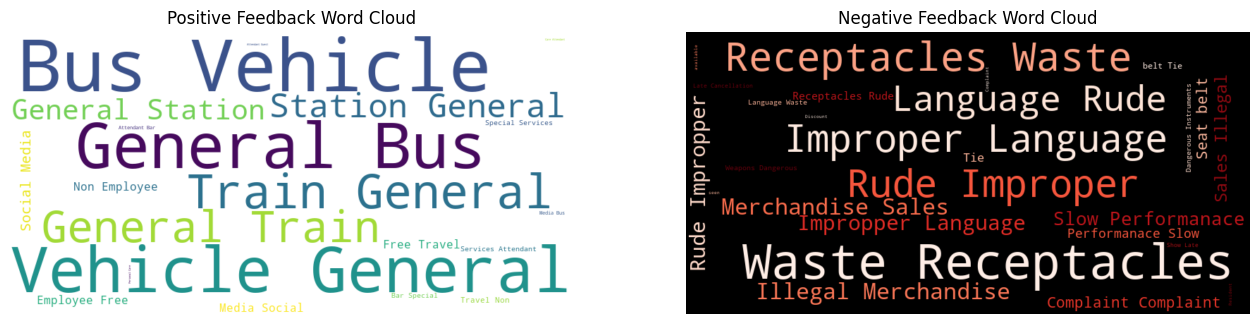

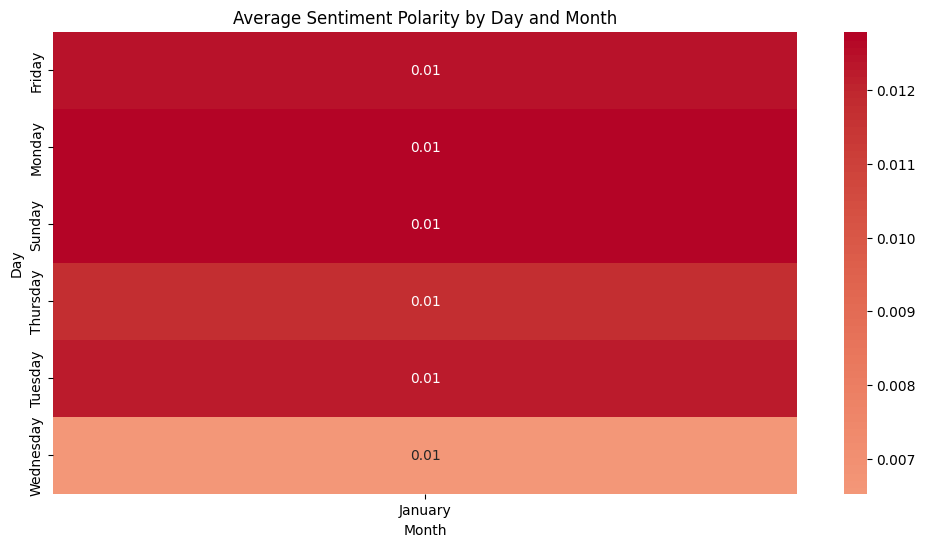

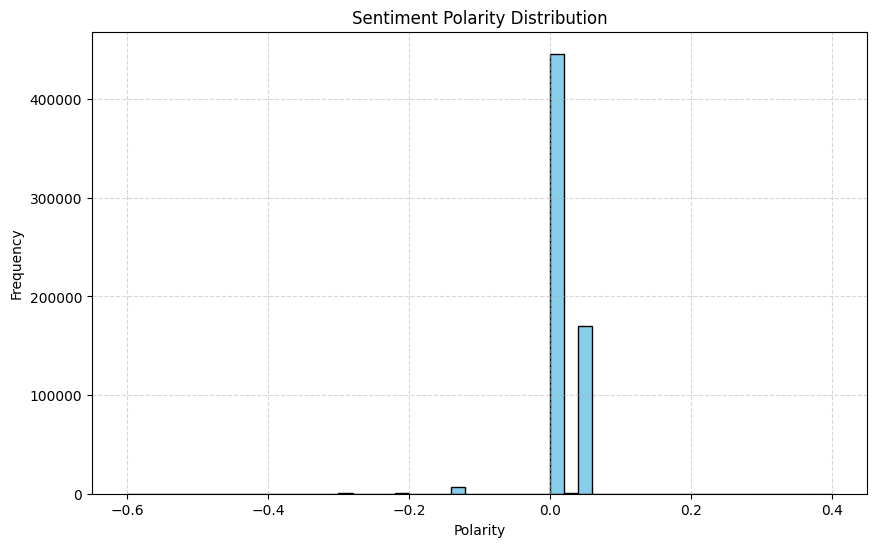

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Mock preparation for sentiment_data
# Assuming 'Feedback' column contains textual feedback and 'Date' contains feedback timestamps
if 'MTA_Customer_Feedback_Data__2014-2019' in dataframes:
    feedback_data = dataframes['MTA_Customer_Feedback_Data__2014-2019']

    # Sample data for feedback sentiment analysis
    feedback_data['Date'] = pd.to_datetime(feedback_data['Year'], format='%Y')  # Assuming 'Year' column exists
    feedback_data['Feedback'] = feedback_data['Subject Detail'].fillna('')  # Assuming 'Subject Detail' is feedback text

    # Sentiment Analysis (using TextBlob for simplicity)
    from textblob import TextBlob
    feedback_data['Polarity'] = feedback_data['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

    sentiment_data = feedback_data[['Date', 'Feedback', 'Polarity']].dropna()
else:
    print("Feedback data not found.")
    sentiment_data = pd.DataFrame(columns=['Date', 'Feedback', 'Polarity'])

# Ensure sentiment_data is prepared
if sentiment_data.empty:
    print("No sentiment data available for visualization.")
else:
    # 1. Sentiment Pie Chart
    sentiment_data['Sentiment Category'] = sentiment_data['Polarity'].apply(
        lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
    )
    sentiment_counts = sentiment_data['Sentiment Category'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(
        sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['lightgreen', 'lightcoral', 'lightblue']
    )
    plt.title('Sentiment Distribution')
    plt.show()

    # 2. Sentiment Trends Over Time
    sentiment_trends = sentiment_data.groupby('Date')['Polarity'].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_trends.index, sentiment_trends, label='Average Sentiment Polarity', color='green')
    plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='Neutral Line')
    plt.title('Sentiment Polarity Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Polarity')
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

    # 3. Sentiment Word Clouds
    positive_feedback = ' '.join(sentiment_data[sentiment_data['Polarity'] > 0]['Feedback'])
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_feedback)

    negative_feedback = ' '.join(sentiment_data[sentiment_data['Polarity'] < 0]['Feedback'])
    negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_feedback)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Feedback Word Cloud')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Feedback Word Cloud')
    plt.axis('off')
    plt.show()

    # 4. Sentiment Heatmap
    sentiment_data['Day'] = sentiment_data['Date'].dt.day_name()
    sentiment_data['Month'] = sentiment_data['Date'].dt.month_name()
    heatmap_data = sentiment_data.pivot_table(
        values='Polarity', 
        index='Day', 
        columns='Month', 
        aggfunc='mean'
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Average Sentiment Polarity by Day and Month')
    plt.show()

    # 5. Sentiment Polarity Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(sentiment_data['Polarity'], bins=50, color='skyblue', edgecolor='black')
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()



Top 3 Peak Hours with Total Ridership:
Hour
17    19228286
16    17468920
8     16268316
Name: ridership, dtype: int64

Top 10 Busiest Stations during Peak Hours:
station_complex
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)           1823908
Grand Central-42 St (S,4,5,6,7)                            1372717
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                          1099183
Fulton St (A,C,J,Z,2,3,4,5)                                 999364
14 St-Union Sq (L,N,Q,R,W,4,5,6)                            894873
59 St-Columbus Circle (A,B,C,D,1)                           739918
34 St-Penn Station (A,C,E)                                  701745
47-50 Sts-Rockefeller Ctr (B,D,F,M)                         655633
34 St-Penn Station (1,2,3)                                  651015
Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)     638197
Name: ridership, dtype: int64


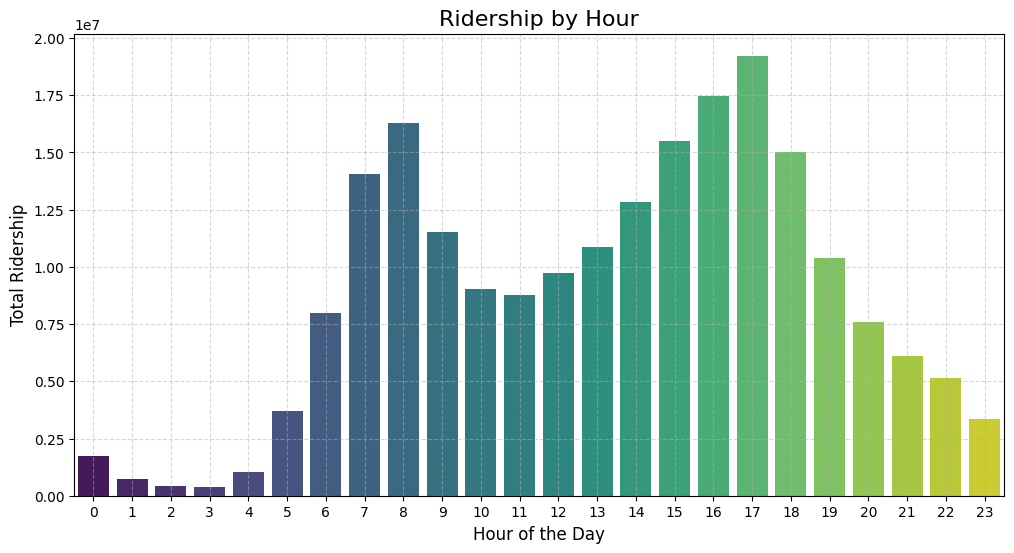

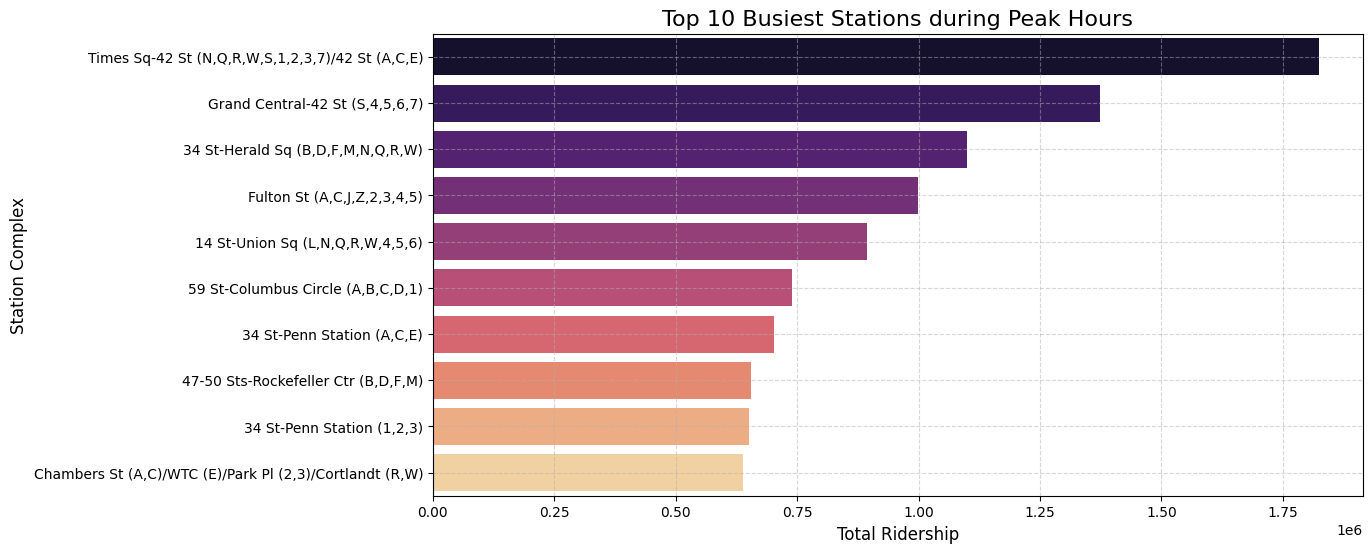

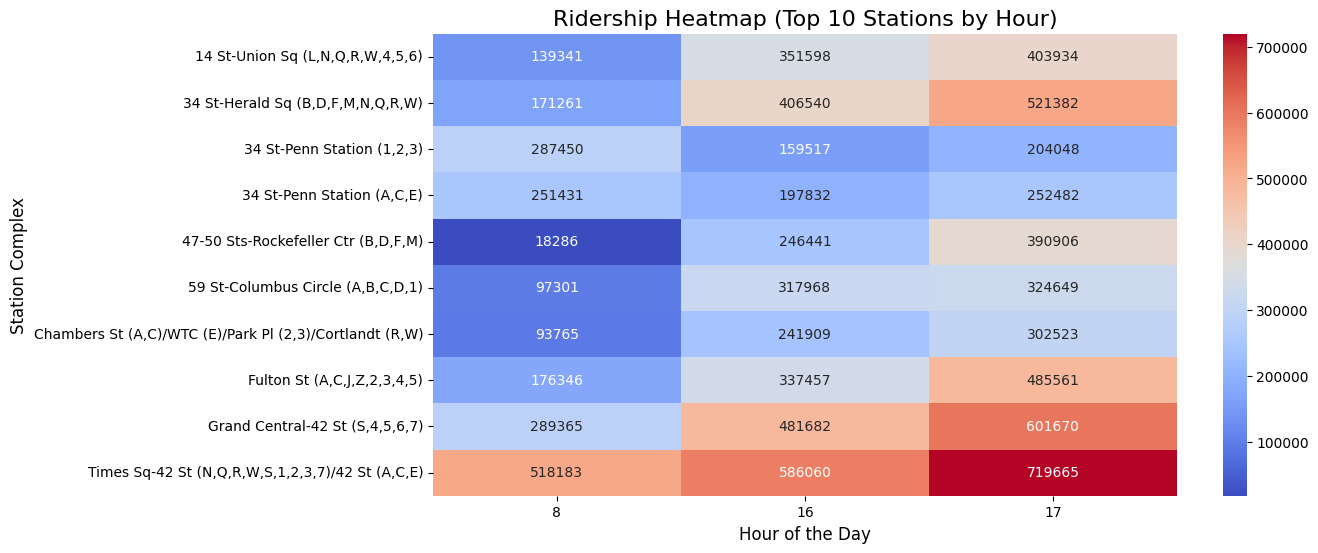

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is loaded
if 'MTA_Subway_Hourly_Ridership__Beginning_July_2020' in dataframes:
    hourly_data = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

    # Convert timestamps to datetime and extract useful time features
    hourly_data['transit_timestamp'] = pd.to_datetime(hourly_data['transit_timestamp'])
    hourly_data['Hour'] = hourly_data['transit_timestamp'].dt.hour
    hourly_data['Date'] = hourly_data['transit_timestamp'].dt.date

    # 1. Identify peak congestion hours
    peak_hours = hourly_data.groupby('Hour')['ridership'].sum().sort_values(ascending=False)
    top_3_hours = peak_hours.head(3)
    print("Top 3 Peak Hours with Total Ridership:")
    print(top_3_hours)

    # 2. Identify busiest stations during peak hours
    top_hours_list = top_3_hours.index.tolist()
    peak_hour_data = hourly_data[hourly_data['Hour'].isin(top_hours_list)]
    top_stations = peak_hour_data.groupby('station_complex')['ridership'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Busiest Stations during Peak Hours:")
    print(top_stations)

    # 3. Visualization of ridership by hour
    plt.figure(figsize=(12, 6))
    sns.barplot(x=peak_hours.index, y=peak_hours.values, palette='viridis')
    plt.title('Ridership by Hour', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Total Ridership', fontsize=12)
    plt.xticks(range(24))
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

    # 4. Visualization of top 10 busiest stations during peak hours
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_stations.values, y=top_stations.index, palette='magma')
    plt.title('Top 10 Busiest Stations during Peak Hours', fontsize=16)
    plt.xlabel('Total Ridership', fontsize=12)
    plt.ylabel('Station Complex', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

    # 5. Ridership heatmap by hour and station (for top 10 stations)
    top_10_stations = top_stations.index.tolist()
    heatmap_data = peak_hour_data[peak_hour_data['station_complex'].isin(top_10_stations)]
    heatmap = heatmap_data.pivot_table(
        values='ridership', 
        index='station_complex', 
        columns='Hour', 
        aggfunc='sum'
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt=".0f")
    plt.title('Ridership Heatmap (Top 10 Stations by Hour)', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Station Complex', fontsize=12)
    plt.show()

else:
    print("Hourly ridership data not found.")
